## Data Load

In [98]:
import talib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
from talib import RSI, BBANDS, MA_Type, STOCH
%matplotlib inline

In [116]:
path = "/Users/frantisek.grossmann/Desktop/Sets/crypto_data/LTC-USD.csv"
df = pd.read_csv(path, names=["Time", "Low", "High", "Open", "Close", "Volume"])
df.head()

,Time,Low,High,Open,Close,Volume
101878,1535215020,58.009998,58.020000,58.020000,58.009998,7.301921
101879,1535215080,58.009998,58.020000,58.009998,58.020000,23.802017
101880,1535215140,58.020000,58.020000,58.020000,58.020000,6.953497
101881,1535215200,58.020000,58.080002,58.020000,58.080002,202.403183
101882,1535215260,58.070000,58.099998,58.070000,58.090000,160.602554


In [119]:
df.tail()

,Time,Low,High,Open,Close,Volume
101878,1535215020,58.009998,58.020000,58.020000,58.009998,7.301921
101879,1535215080,58.009998,58.020000,58.009998,58.020000,23.802017
101880,1535215140,58.020000,58.020000,58.020000,58.020000,6.953497
101881,1535215200,58.020000,58.080002,58.020000,58.080002,202.403183
101882,1535215260,58.070000,58.099998,58.070000,58.090000,160.602554


## Features construction using TA-lib

In [133]:
close = df["Close"].values
high = df["High"].values
low = df["Low"].values

# Moving Average
df['3day MA'] = df['Close'].shift(1).rolling(window = 3).mean()
df['5day MA'] = df['Close'].shift(1).rolling(window = 5).mean()
df['10day MA'] = df['Close'].shift(1).rolling(window = 10).mean()
# Standard deviation
df['STD']= df['Close'].rolling(5).std()
# Relative Strength index
df['RSI'] = RSI(df['Close'].values, timeperiod = 9)
# Bollinger Bands
up, mid, low = BBANDS(close, timeperiod = 10, nbdevup = 10, nbdevdn = 10, matype = 5)
# Stochastic 
slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=10, slowk_matype=0, slowd_period=10, slowd_matype=0)

## Plotting 

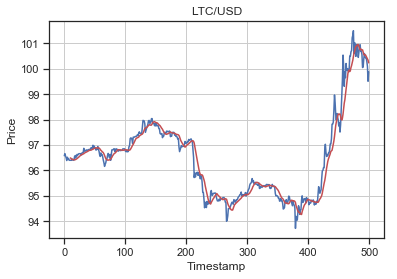

In [101]:
# Moving Average
Slice = df.iloc[0:500, 4:5] # first thousand rows of the "Close" column
df['10day MA'] = Slice.shift(1).rolling(window = 10).mean()
plt.title('LTC/USD')
plt.plot(Slice,color="b")
plt.plot(df['10day MA'],color="r")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid()
plt.show()

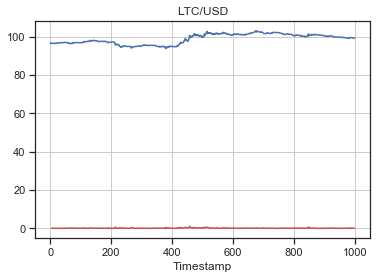

In [115]:
# Standard Deviation
Slice = df.iloc[0:1000, 4:5] # first thousand rows of the "Close" column
df['STD']= Slice.rolling(5).std()
plt.title('LTC/USD')
plt.plot(Slice,color="b")
plt.plot(df["STD"],color="r")
plt.xlabel('Timestamp')
plt.grid()
plt.show()

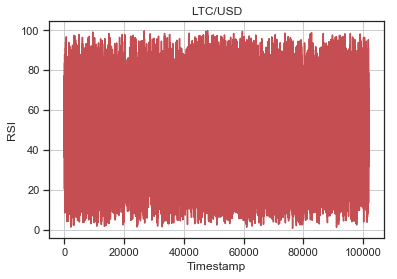

In [123]:
# Relative Strength Index
#Slice = df.iloc[0:500, 4:5] 
df['RSI'] = RSI(df['Close'].values, timeperiod = 9)
plt.title('LTC/USD')
plt.plot(df['RSI'],color="r")
plt.xlabel('Timestamp')
plt.ylabel('RSI')
plt.grid()
plt.show()

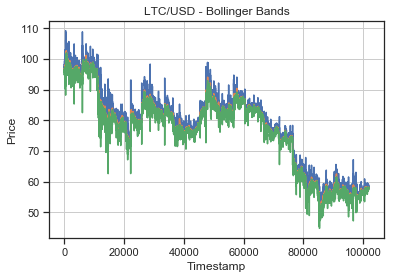

In [132]:
# Bollinger Bands
plt.title('LTC/USD - Bollinger Bands')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.plot(up)
plt.plot(mid)
plt.plot(low)
plt.grid()
plt.show()

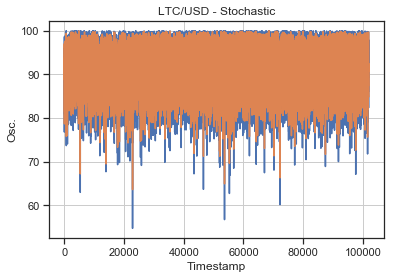

In [134]:
# Stochastic Oscillator
plt.title('LTC/USD - Stochastic')
plt.xlabel('Timestamp')
plt.ylabel('Osc.')
plt.plot(slowk)
plt.plot(slowd)
plt.grid()
plt.show()